In [32]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
from datetime import datetime

In [2]:
# загрузим данные за декабрь и январь
dec = pd.read_csv(r'C:/Users/Tanya/citymobil/green_tripdata_2019-12.csv', low_memory=False)
jan = pd.read_csv(r'C:/Users/Tanya/citymobil/green_tripdata_2020-01.csv', low_memory=False)
pd.options.display.max_columns = None

In [3]:
# объединим их в один датасет
data =pd.concat([dec, jan], ignore_index=True)

In [4]:
data


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,0.50,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898392,NaN,2020-01-31 23:29:00,2020-01-31 23:47:00,NaN,NaN,167,32,NaN,4.58,23.21,2.75,0.0,0.00,0.0,NaN,0.3,26.26,NaN,NaN,NaN
898393,NaN,2020-01-31 23:57:00,2020-02-01 00:23:00,NaN,NaN,81,69,NaN,6.55,27.27,2.75,0.0,0.00,0.0,NaN,0.3,30.32,NaN,NaN,NaN
898394,NaN,2020-01-31 23:57:00,2020-02-01 00:10:00,NaN,NaN,244,241,NaN,3.34,25.95,2.75,0.0,0.00,0.0,NaN,0.3,29.00,NaN,NaN,NaN
898395,NaN,2020-01-31 23:27:00,2020-02-01 00:04:00,NaN,NaN,68,17,NaN,8.92,30.39,2.75,0.0,0.00,0.0,NaN,0.3,33.44,NaN,NaN,NaN


Присутствует 17 признаков + 1 целевой

In [5]:
# осмотрим таблицу
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,0.50,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898392,NaN,2020-01-31 23:29:00,2020-01-31 23:47:00,NaN,NaN,167,32,NaN,4.58,23.21,2.75,0.0,0.00,0.0,NaN,0.3,26.26,NaN,NaN,NaN
898393,NaN,2020-01-31 23:57:00,2020-02-01 00:23:00,NaN,NaN,81,69,NaN,6.55,27.27,2.75,0.0,0.00,0.0,NaN,0.3,30.32,NaN,NaN,NaN
898394,NaN,2020-01-31 23:57:00,2020-02-01 00:10:00,NaN,NaN,244,241,NaN,3.34,25.95,2.75,0.0,0.00,0.0,NaN,0.3,29.00,NaN,NaN,NaN
898395,NaN,2020-01-31 23:27:00,2020-02-01 00:04:00,NaN,NaN,68,17,NaN,8.92,30.39,2.75,0.0,0.00,0.0,NaN,0.3,33.44,NaN,NaN,NaN


In [6]:
# осмотрим на пропуски
data.isnull().sum()

VendorID                 206776
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag       206776
RatecodeID               206776
PULocationID                  0
DOLocationID                  0
passenger_count          206776
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                898397
improvement_surcharge         2
total_amount                  0
payment_type             206776
trip_type                206779
congestion_surcharge     206778
dtype: int64

в шести признаках 1/5 пропусков. Проработаем их при осмотре. и в один признак состоит из пустых значений. Удалим его сразу

In [7]:
# удаляем
data.drop(['ehail_fee'], axis=1, inplace=True)

In [8]:
# посмотрим на строки, где у нас пропуски
data[data.isnull().any(1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
356911,1.0,2019-12-31 20:47:14,2019-12-31 20:47:14,Y,1.0,210,264,1.0,0.00,3.50,0.50,0.5,0.0,0.0,NaN,4.50,2.0,NaN,NaN
357903,1.0,2019-12-31 21:29:23,2019-12-31 21:55:11,Y,1.0,89,107,1.0,10.40,32.00,0.50,0.5,0.0,0.0,NaN,33.00,2.0,NaN,NaN
359902,NaN,2019-12-01 00:51:00,2019-12-01 01:14:00,NaN,NaN,70,138,NaN,6.82,25.75,2.75,0.5,0.0,0.0,0.0,29.00,NaN,NaN,NaN
359903,NaN,2019-12-01 00:16:00,2019-12-01 00:38:00,NaN,NaN,74,32,NaN,7.88,35.59,2.75,0.5,0.0,0.0,0.0,38.84,NaN,NaN,NaN
359904,NaN,2019-12-01 00:20:00,2019-12-01 00:43:00,NaN,NaN,235,143,NaN,8.79,39.75,2.75,0.5,0.0,0.0,0.0,43.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898392,NaN,2020-01-31 23:29:00,2020-01-31 23:47:00,NaN,NaN,167,32,NaN,4.58,23.21,2.75,0.0,0.0,0.0,0.3,26.26,NaN,NaN,NaN
898393,NaN,2020-01-31 23:57:00,2020-02-01 00:23:00,NaN,NaN,81,69,NaN,6.55,27.27,2.75,0.0,0.0,0.0,0.3,30.32,NaN,NaN,NaN
898394,NaN,2020-01-31 23:57:00,2020-02-01 00:10:00,NaN,NaN,244,241,NaN,3.34,25.95,2.75,0.0,0.0,0.0,0.3,29.00,NaN,NaN,NaN
898395,NaN,2020-01-31 23:27:00,2020-02-01 00:04:00,NaN,NaN,68,17,NaN,8.92,30.39,2.75,0.0,0.0,0.0,0.3,33.44,NaN,NaN,NaN


Данных достаточно много, и так как пропуски для всех признаков повторяются в одних и тех же признаках, можно их удалить

In [9]:
# удаляем 
data.dropna(axis=0,inplace=True)

In [33]:
# превратим информацию о посадке в удобный формат
data['lpep_pickup_datetime'] = data['lpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [34]:
# превратим информацию о высадке  в удобный формат
data['lpep_dropoff_datetime'] = data['lpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [35]:
# осмотрим признак
data['passenger_count'].value_counts()

1.0    594894
2.0     51395
5.0     20332
3.0     10178
6.0     10127
4.0      3422
0.0      1230
8.0        21
7.0        15
9.0         4
Name: passenger_count, dtype: int64

In [36]:
# осмотрим признак
data['store_and_fwd_flag'].value_counts()

N    689496
Y      2122
Name: store_and_fwd_flag, dtype: int64

In [37]:
# осмотрим признак
data['RatecodeID'].value_counts()

1.0     672449
5.0      16640
2.0       1615
4.0        516
3.0        390
6.0          7
99.0         1
Name: RatecodeID, dtype: int64

In [38]:
# значения 6 и 99 в рейтинге некорректны. заменим их на самые часто встречающеися

data['RatecodeID'] = data['RatecodeID'].replace(6.0, 1.0).replace(99.0, 1.0)


In [39]:
# осмотрим значения места посадки
data['PULocationID'].unique()

array([145,  24,  74, 255,  80,  21, 181,   7,  75, 112,  97, 129, 223,
        42, 116,  83,  65, 260,  41, 208,  82,  85, 247,  66, 130, 166,
        92, 256, 244, 179,  25, 152,  95, 159, 226, 225,  76,  61,  47,
        10, 134, 138, 106,  33, 173, 150,  37,  20,  69,  49, 168,  36,
       146,  55,  17, 119,  29, 264, 167,  35, 127,  28, 153, 193, 228,
        39,  52, 210, 212,  18, 190, 263,  81,  72, 120, 182,  62, 243,
       169,  70,  67,  43,  89, 135, 198, 258, 196,  56, 217, 197, 157,
       171,  77,  54, 136, 132, 242,  64, 195, 248, 147, 254, 227,  38,
       188, 185, 200, 189, 213, 177,  98,  78, 216, 131, 218, 122, 126,
       192, 235, 250,  40,  60, 165, 220, 241,  94, 117, 149, 121,  91,
       156,  14, 222, 236,  71,  86, 205, 155,  32, 174, 128, 183,  31,
       102, 123,   3, 160,  26,  22, 215,  34, 252, 178, 265,  53, 238,
       191,  51,  15, 108,  16,  63,  19, 203, 124,   9, 259, 240,  57,
       139, 207, 133, 115, 180,  11, 257,  93,  23,  46, 201,  5

In [40]:
data['PULocationID'].value_counts().sort_index()

1        17
2         3
3       172
4         4
6         4
       ... 
261       7
262      27
263     391
264    1186
265     434
Name: PULocationID, Length: 254, dtype: int64

места отмечены кодовым числом. лишних значений нет

In [41]:
# осмотрим значения места посадки
data['DOLocationID'].unique()

array([145,  41, 157, 255, 123, 228,  53, 223, 232, 227, 260,   7, 129,
       116,  42, 152, 264,  43, 160, 188,  82, 159,  70,  39, 164, 224,
       135,  17,  61,  95, 148,   4, 243,  36, 226,  80, 244, 258, 238,
       225,  66, 167,  28,  11,  76,  25,  74, 248, 233,  10, 191, 181,
        67, 196, 130, 138, 179, 173,  49,  52,  13, 168,  40, 239,  18,
       150, 151,   3, 166, 102,  60,  33, 126, 256,  57, 112, 158,  83,
       198, 263,  75,  55,  56,  73, 171, 162,  65, 211, 177, 134, 265,
        38, 247, 217, 137,  50,  97,  37, 180, 262,  14,  62,  89, 101,
       139, 195,  68,  32, 192,  47, 174, 107,  81, 236, 230, 127, 197,
        92, 146, 246,  69, 147, 250, 186, 257,  72, 189, 143,  71, 213,
        90, 121, 141, 216, 218, 210,  22, 193, 144, 237, 149,  48, 234,
        79, 133, 131, 215, 249, 122, 229,  29, 231, 205, 235,  63, 165,
        45, 140,  64,  20, 240, 169,  98,  35,  21,  93,  87, 163,  91,
       124, 252, 155,  78, 132,  94,  26, 136, 113,  16, 119, 24

In [42]:
# осмотрим значения места высадки
data['DOLocationID'].value_counts().sort_index()

1       283
2         2
3       284
4       615
6         6
       ... 
261     555
262    4154
263    8491
264    3131
265    1672
Name: DOLocationID, Length: 258, dtype: int64

Значений не больше, чем в столбце посадки. Лишлих нет

In [43]:
# осмотрим признак
data['passenger_count'].value_counts()

1.0    594894
2.0     51395
5.0     20332
3.0     10178
6.0     10127
4.0      3422
0.0      1230
8.0        21
7.0        15
9.0         4
Name: passenger_count, dtype: int64

In [44]:
# осмотрим
data['trip_distance'].value_counts().sort_index()

-24     1
-14     1
-11     2
-5      1
-4      2
       ..
 87     1
 101    1
 124    1
 131    1
 333    1
Name: trip_distance, Length: 78, dtype: int64

In [45]:
# странно выглядят поездки с отрицательным расстоянием. взглянем на них
data[data['trip_distance'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
53668,2.0,2019-12-05 18:01:22,2019-12-05 18:07:37,N,5.0,193,145,1.0,-1,11,0.0,0.5,1,0.00,0.3,14.48,1.0,1.0,0.00
60451,2.0,2019-12-06 09:07:12,2019-12-06 09:13:13,N,5.0,145,193,1.0,-1,9,0.0,0.5,2,0.00,0.3,13.45,1.0,1.0,0.00
60567,2.0,2019-12-06 10:02:56,2019-12-06 10:09:09,N,5.0,145,193,1.0,-1,7,0.0,0.5,1,0.00,0.3,10.95,1.0,1.0,0.00
64334,2.0,2019-12-06 15:49:42,2019-12-06 15:56:14,N,5.0,193,193,1.0,-1,7,0.0,0.5,1,0.00,0.3,10.95,1.0,1.0,0.00
66406,2.0,2019-12-06 17:04:39,2019-12-06 18:31:26,N,5.0,209,139,1.0,-1,79,0.0,0.0,0,0.00,0.0,79.09,2.0,1.0,0.00
67336,2.0,2019-12-06 18:04:17,2019-12-06 18:11:30,N,5.0,193,145,1.0,-1,7,0.0,0.5,1,0.00,0.3,10.95,1.0,1.0,0.00
75079,2.0,2019-12-07 10:09:10,2019-12-07 10:17:41,N,5.0,61,188,1.0,-1,9,0.0,0.5,2,0.00,0.3,13.95,1.0,1.0,0.00
90607,2.0,2019-12-08 13:40:04,2019-12-08 14:01:43,N,5.0,124,76,1.0,-4,9,0.0,0.5,0,0.00,0.3,9.80,2.0,1.0,0.00
110041,2.0,2019-12-10 08:47:20,2019-12-10 09:23:15,N,5.0,61,45,1.0,-4,18,0.0,0.5,4,0.00,0.3,27.81,1.0,1.0,2.75
111482,2.0,2019-12-10 11:09:49,2019-12-10 11:18:24,N,5.0,145,193,1.0,-2,10,0.0,0.5,1,0.00,0.3,13.95,1.0,1.0,0.00


в других столбцах подозрительного нет. Пока оставим

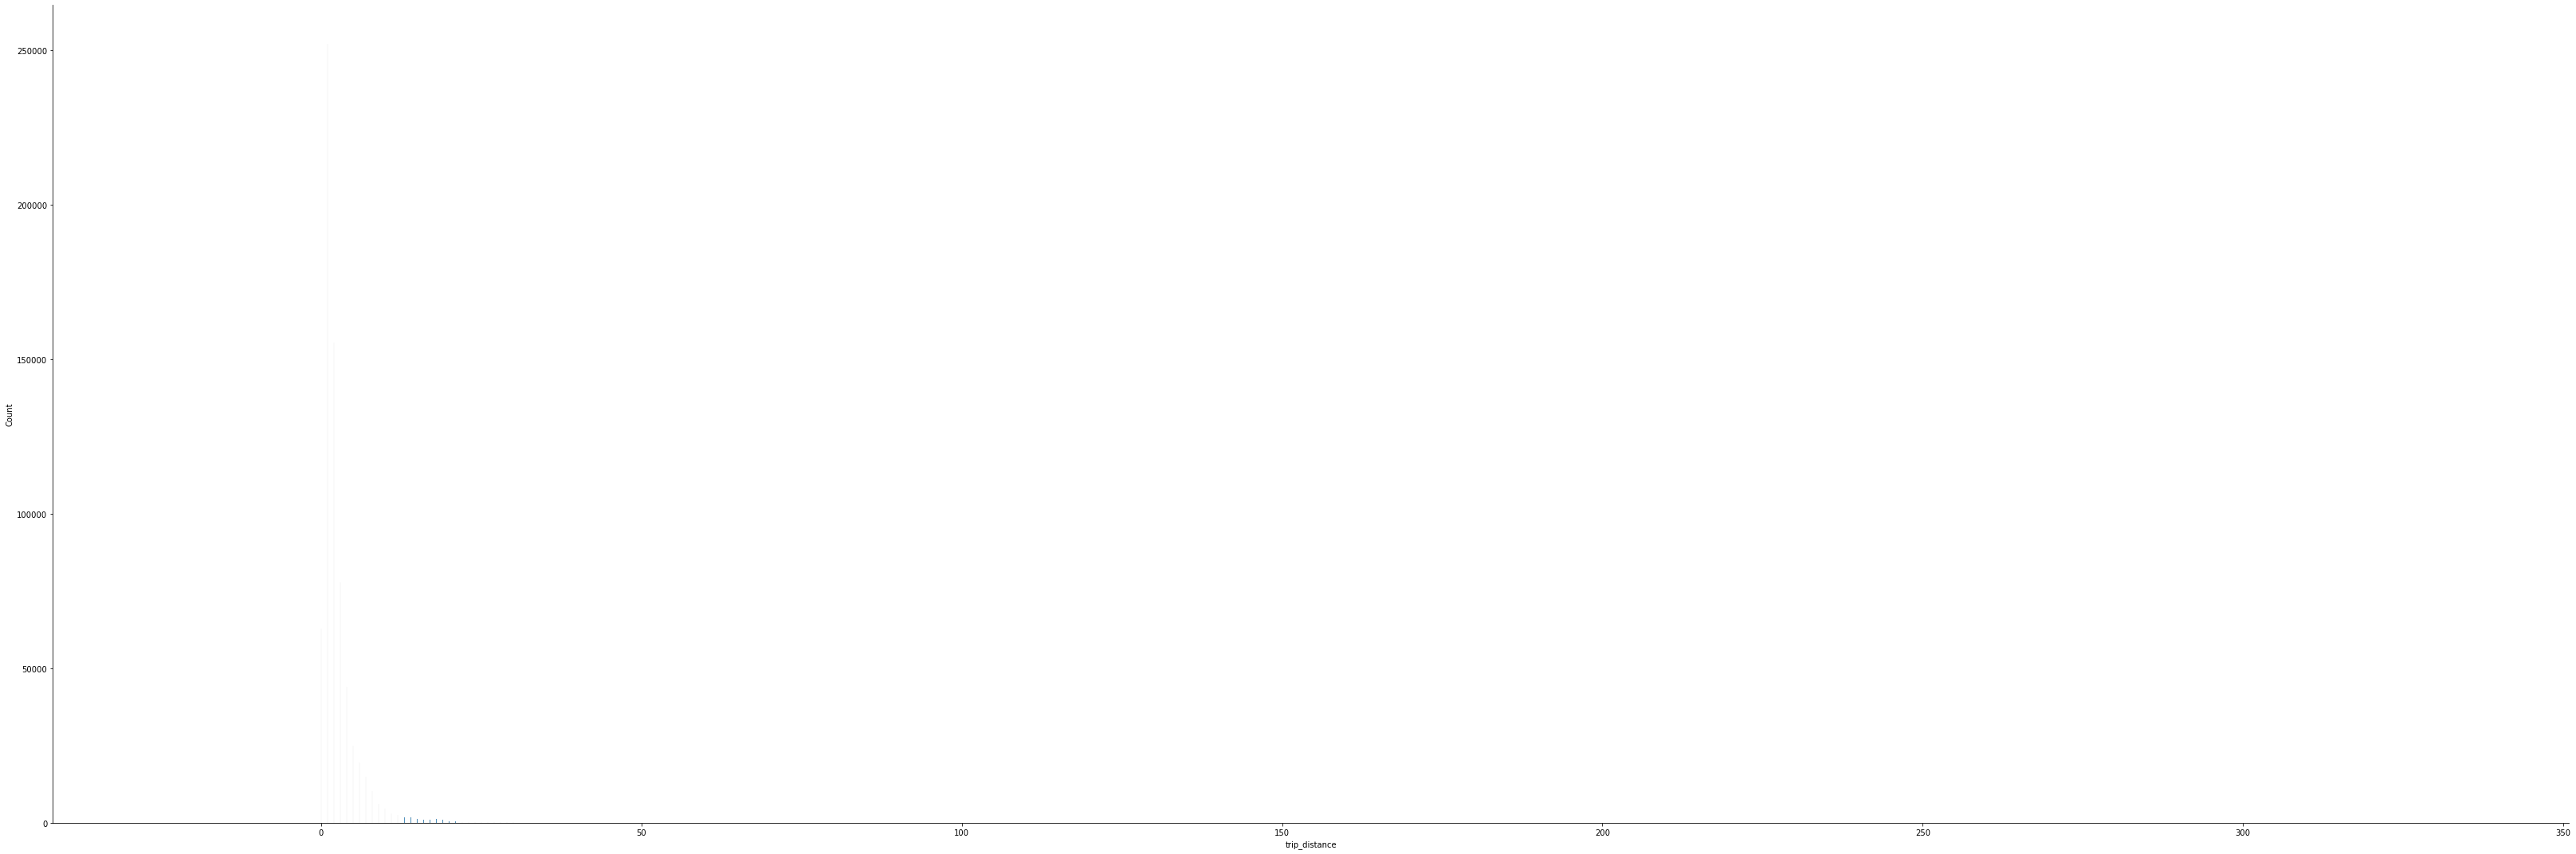

In [46]:
# взглянем на распределение дистанции
sns.displot(data['trip_distance'],height=15, aspect=3)

На графике видно, что основные поездки происходят на расстоянии до 10км. и редкие поездки на дистанцию больше

In [47]:
data['fare_amount'].value_counts().sort_index()

-210    1
-200    1
-180    1
-125    1
-100    2
       ..
 408    1
 488    1
 500    1
 630    1
 753    1
Name: fare_amount, Length: 260, dtype: int64

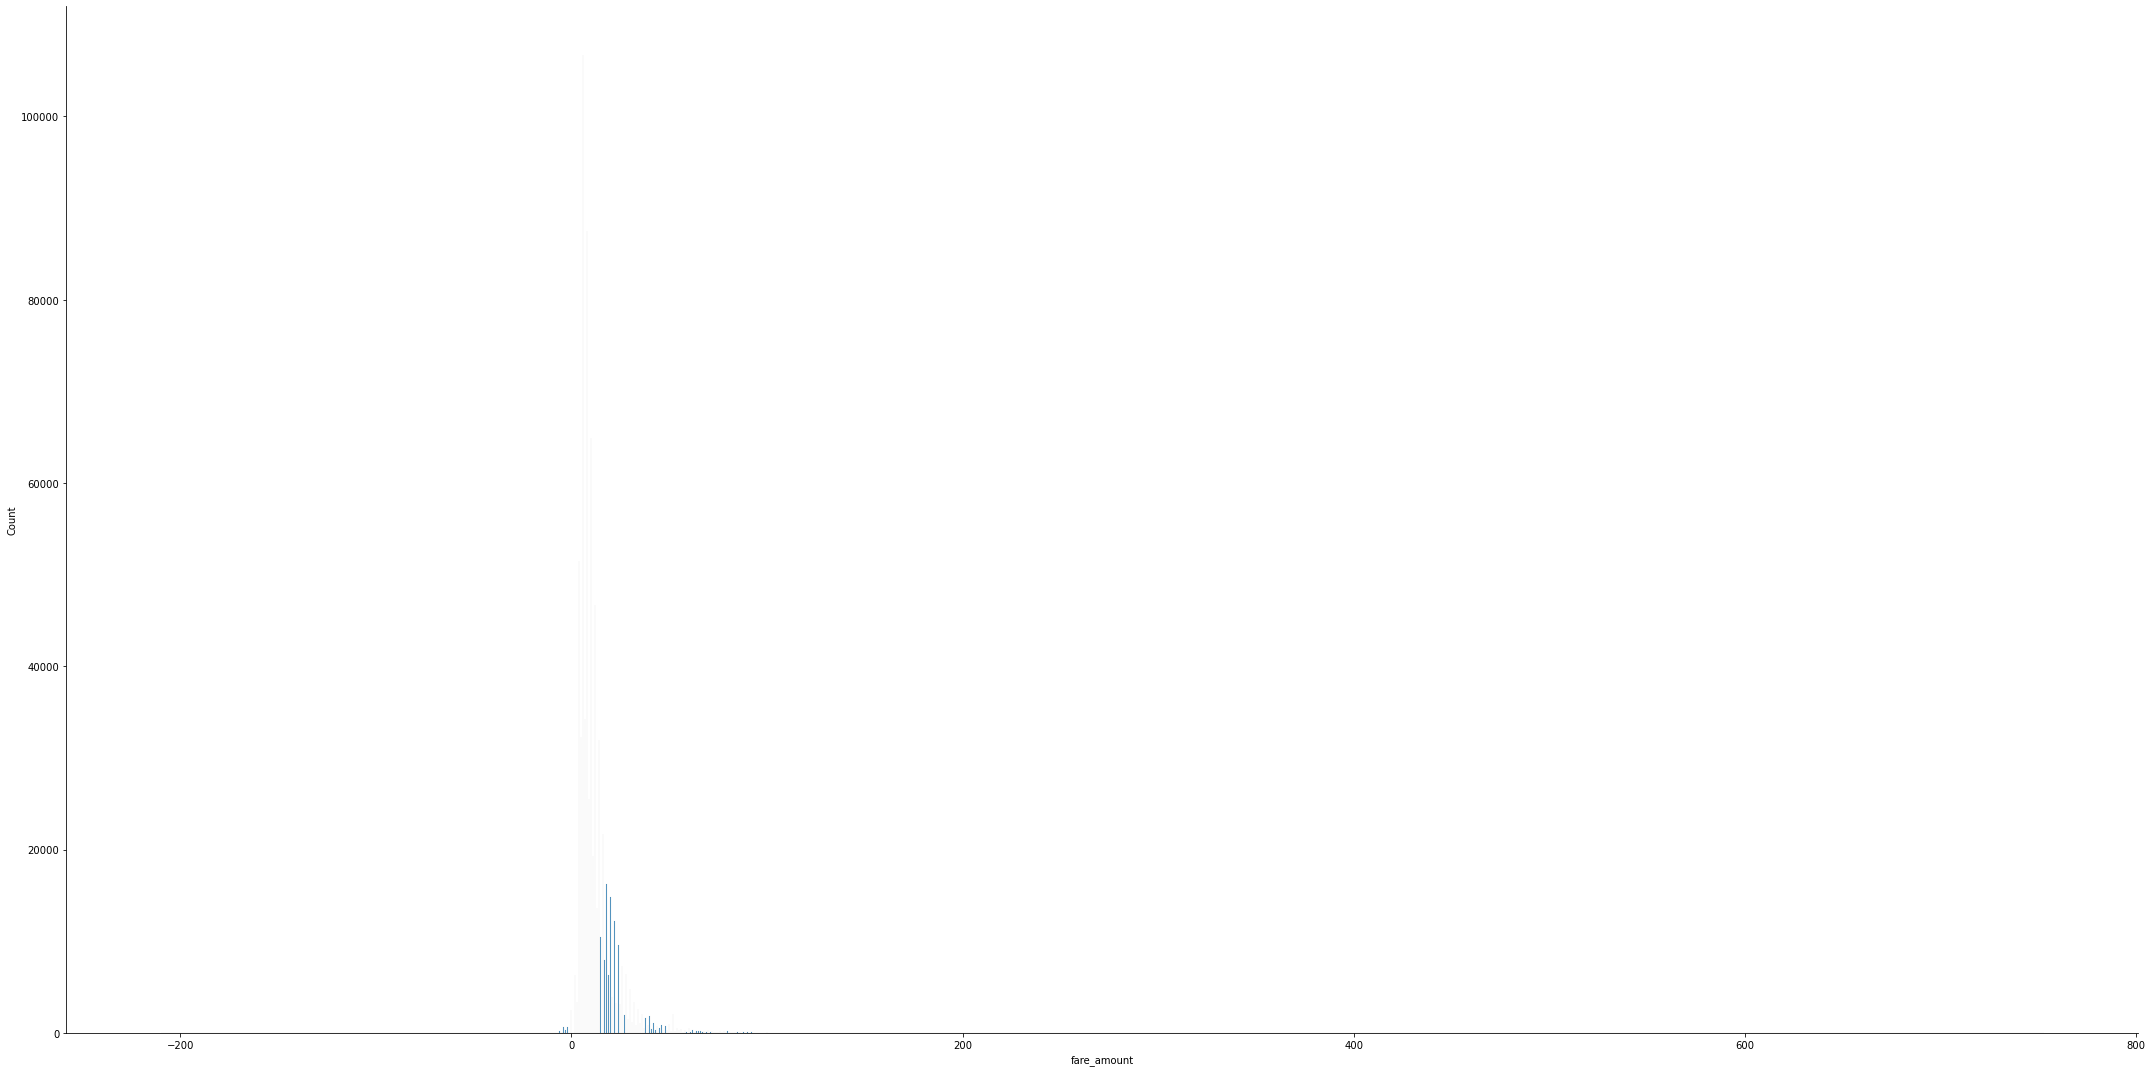

In [48]:
# взглянем на распределение
sns.displot(data['fare_amount'],height=15, aspect=2)

In [49]:
data['fare_amount'].describe()

count    691618.000000
mean         12.118792
std          10.423894
min        -210.000000
25%           6.000000
50%           9.000000
75%          14.000000
max         753.000000
Name: fare_amount, dtype: float64

Средняя цена поездки - 12 ед.

In [50]:
# осмотрим экстра доплату
data['extra'].value_counts()

 0.00    355754
 0.50    180278
 1.00    136891
 2.75      9691
 3.25      4132
 3.75      3510
-0.50       658
-1.00       381
 4.50       309
-4.50        10
-3.25         1
 1.80         1
 0.80         1
 2.00         1
Name: extra, dtype: int64

Экстра доплата практически отсутствует

In [51]:
# осмотрим налог с поездки
data['mta_tax'].value_counts()

 0.50    672244
 0.00     17373
-0.50      1993
 3.55         7
 2.75         1
Name: mta_tax, dtype: int64

In [52]:
data['mta_tax'].mean()

0.48459279544488426

Средний налог с поездки составляет 0.48 ед.

In [53]:
#осмотрим чаевые
data['tip_amount'].value_counts().sort_index()

-90          1
-3           1
-2           1
-1          28
 0      393713
         ...  
 284         1
 300         3
 333         1
 441         1
 450         2
Name: tip_amount, Length: 88, dtype: int64

In [54]:
# отрицательыне чаевые выглядят странно. взглянем на них
data[data['tip_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
4462,2.0,2019-12-01 13:09:41,2019-12-01 13:09:51,N,1.0,193,193,6.0,0,-2,0.0,-0.5,-1,0.0,-0.3,-3.96,3.0,1.0,0.0
14178,2.0,2019-12-02 13:42:17,2019-12-02 13:42:53,N,1.0,193,193,1.0,0,-2,0.0,-0.5,-1,0.0,-0.3,-3.96,3.0,1.0,0.0
24188,2.0,2019-12-03 11:19:32,2019-12-03 11:20:54,N,1.0,7,193,1.0,0,-3,0.0,-0.5,-1,0.0,-0.3,-4.56,3.0,1.0,0.0
47068,2.0,2019-12-05 09:58:44,2019-12-05 09:58:46,N,1.0,264,264,1.0,0,-2,0.0,-0.5,-1,0.0,-0.3,-3.96,3.0,1.0,0.0
89833,2.0,2019-12-08 11:58:00,2019-12-08 11:58:43,N,1.0,7,193,1.0,0,-2,0.0,-0.5,-1,0.0,-0.3,-3.96,3.0,1.0,0.0
92154,2.0,2019-12-08 15:56:04,2019-12-08 16:06:04,N,1.0,82,260,2.0,1,-8,0.0,-0.5,-90,0.0,-0.3,-98.80,4.0,1.0,0.0
93380,2.0,2019-12-08 17:26:32,2019-12-08 17:26:52,N,3.0,181,181,1.0,0,-20,0.0,0.0,-2,0.0,-0.3,-24.25,3.0,1.0,0.0
100010,2.0,2019-12-09 11:28:18,2019-12-09 11:29:01,N,1.0,193,193,1.0,0,-2,0.0,-0.5,-1,0.0,-0.3,-4.29,3.0,1.0,0.0
100471,2.0,2019-12-09 11:28:09,2019-12-09 11:29:05,N,1.0,193,193,1.0,0,-2,0.0,-0.5,-1,0.0,-0.3,-3.96,3.0,1.0,0.0
123874,2.0,2019-12-11 12:23:30,2019-12-11 12:23:39,N,1.0,193,193,1.0,0,-2,0.0,-0.5,-1,0.0,-0.3,-3.96,3.0,1.0,0.0


Вгллянув на время посадки/высадки, можно предположить, что это не состоявшиеся поездки

In [55]:
# осмотрим tolls_amount
data['tolls_amount'].value_counts().sort_index()

-6.12          1
 0.00     675329
 0.80          1
 1.00          4
 1.30          2
           ...  
 39.74         1
 45.75         1
 48.00         1
 48.88         1
 96.12         1
Name: tolls_amount, Length: 115, dtype: int64

In [56]:
# удалим его
data.drop([567422], axis='index', inplace=True)

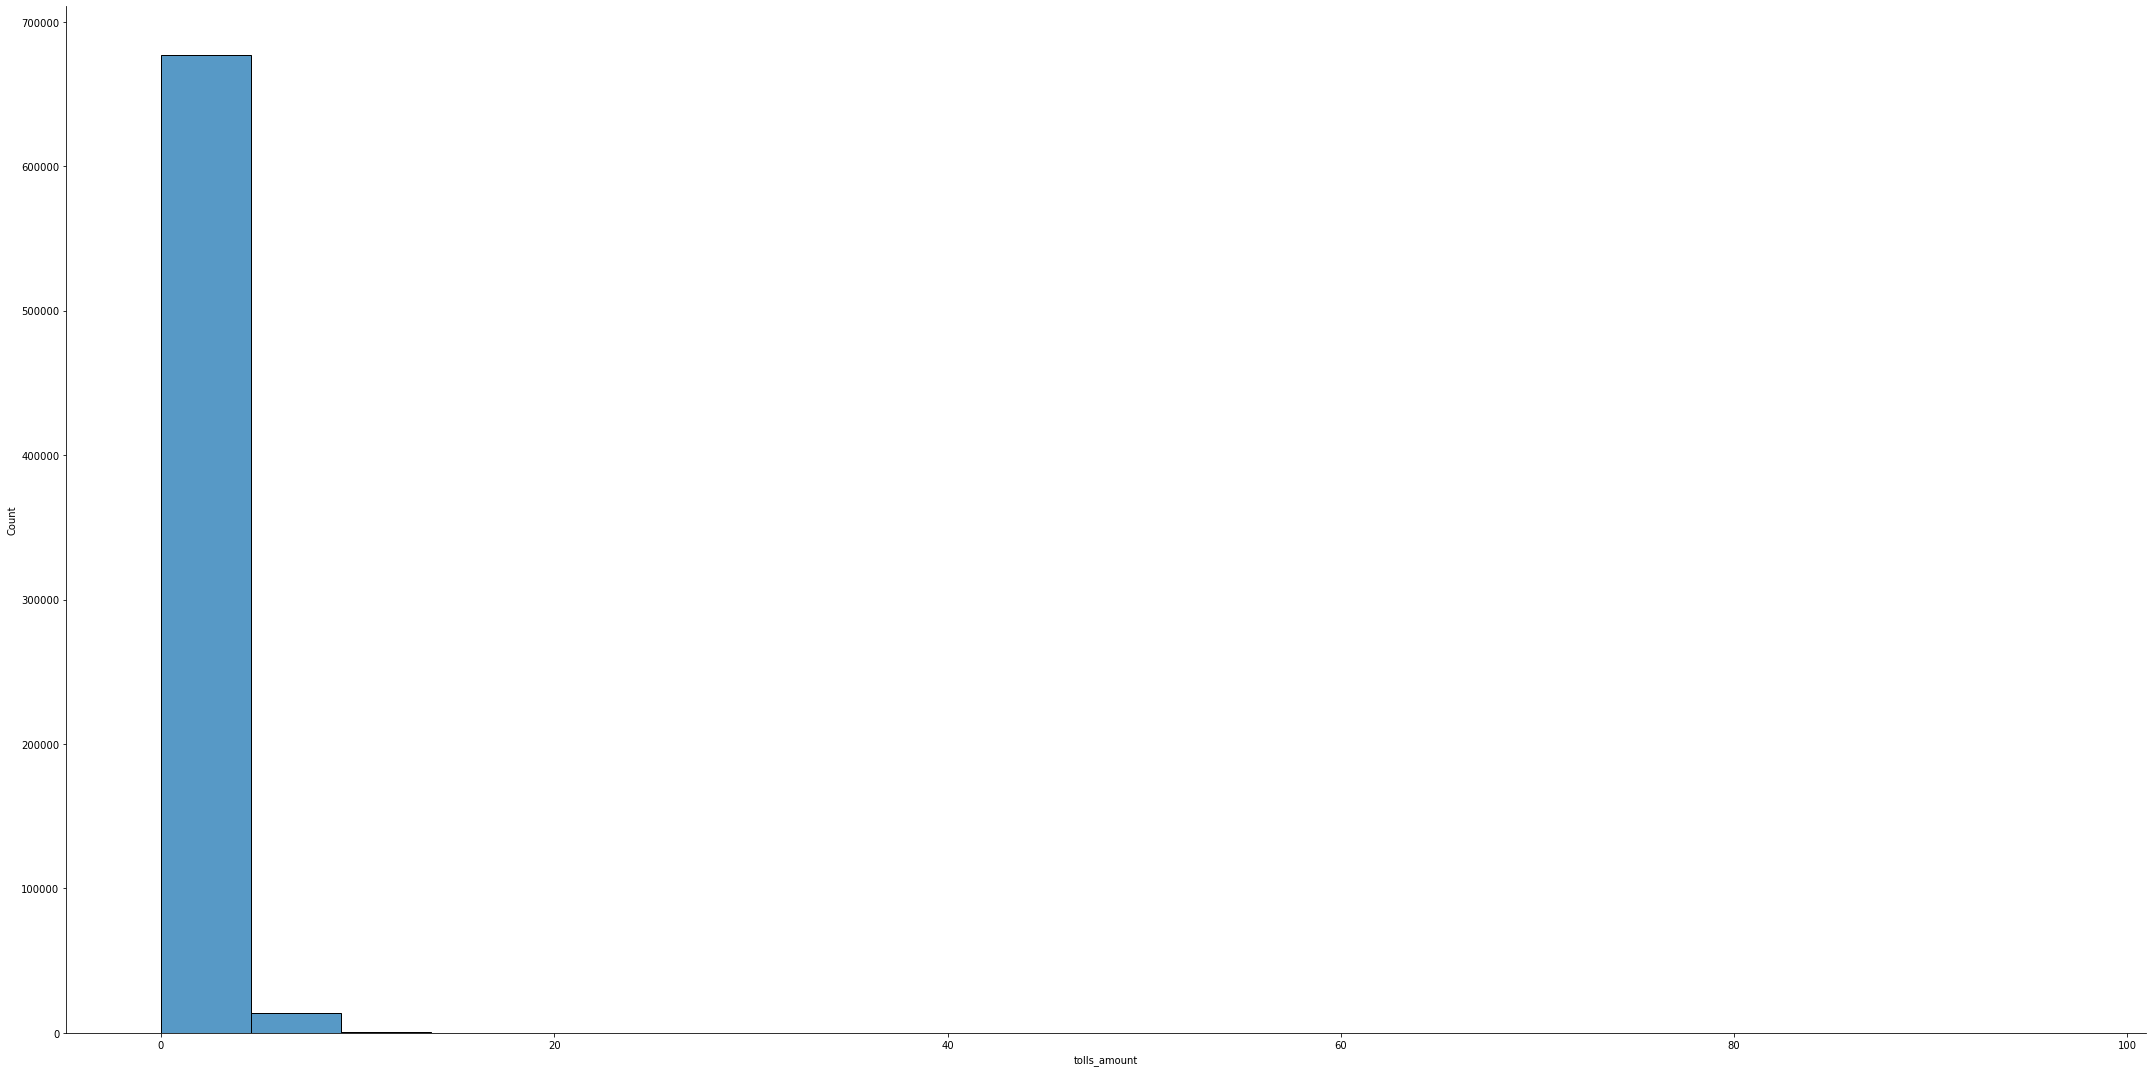

In [57]:
#взглянем на распределение
sns.displot(data['tolls_amount'],height=15, aspect=2)

In [58]:
# осмотрим надбавку за поездку
data['improvement_surcharge'].value_counts()

 0.30    681211
 0.00      8350
-0.30      2055
 0.17         1
Name: improvement_surcharge, dtype: int64

In [59]:
data['total_amount'].value_counts().sort_index()

-210.30    1
-200.00    1
-180.30    1
-125.00    1
-100.30    1
          ..
 462.80    1
 488.80    1
 500.30    1
 636.92    1
 753.80    1
Name: total_amount, Length: 6030, dtype: int64

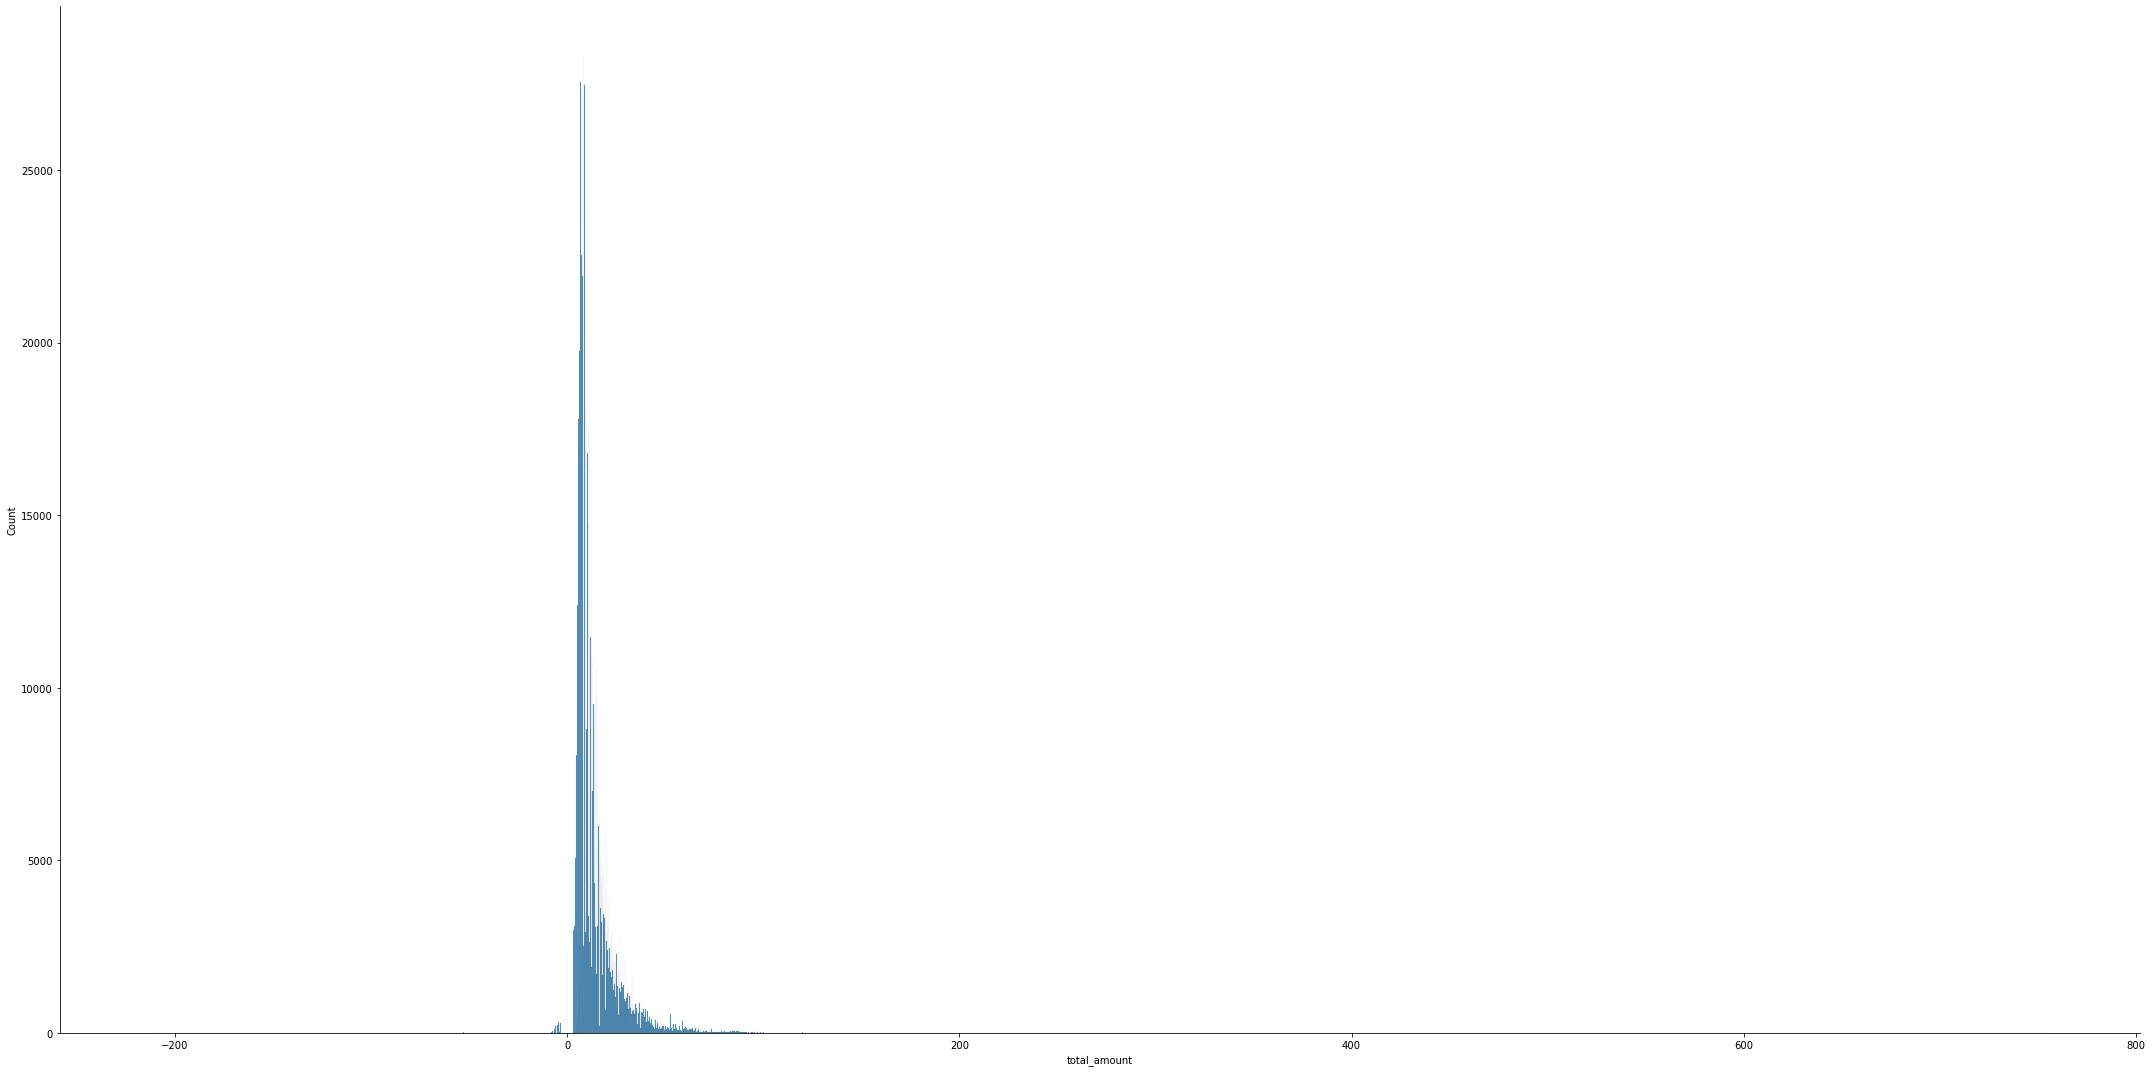

In [60]:
# посмотрим на распределение
sns.displot(data['total_amount'],height=15, aspect=2)

In [61]:
# осмотрим тип оплаты
data['payment_type'].value_counts()

1.0    375936
2.0    310830
3.0      3523
4.0      1304
5.0        24
Name: payment_type, dtype: int64

Присутствует 5 типов оплаты

In [62]:
# осмотрим тип поездки
data['trip_type'].value_counts()

1.0    675618
2.0     15999
Name: trip_type, dtype: int64

Присутствует 2 типа поездки

In [63]:
# осмотрим доплату за поездку
data['congestion_surcharge'].value_counts()

 0.00    578778
 2.75    112635
 2.50       182
 0.75        12
-2.75        10
Name: congestion_surcharge, dtype: int64

Чаще всего доплата отсутсвует. Иногда - минимальная

In [64]:
# добавим признак "время поездки"
data['dur'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).astype('timedelta64[s]')

In [65]:
# добавим признаки месяца, даты и дня недели

data['month'] = data['lpep_pickup_datetime'].apply(lambda x: x.month)
data['day'] = data['lpep_pickup_datetime'].apply(lambda x: x.day)
data['weekday'] = data['lpep_pickup_datetime'].apply(lambda x: x.weekday())

In [66]:
data['month'].value_counts()

12    359864
1     331716
2         20
11         7
9          5
4          3
3          2
Name: month, dtype: int64

In [67]:
# Присутствуют другие месяца. Удалим их
data = data.query('month ==1 or month == 12')

### Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?

In [69]:
data[['VendorID', 'total_amount']].groupby(['VendorID']).mean()

,total_amount
VendorID,
1.0,15.674042
2.0,14.947055


цена поездки не сильно зависит от VendorID

In [70]:
data[['store_and_fwd_flag', 'total_amount']].groupby(['store_and_fwd_flag']).mean()

,total_amount
store_and_fwd_flag,
N,15.069460
Y,14.994995


цена поездки не зависит от store_and_fwd_flag

In [71]:
data[['RatecodeID', 'total_amount']].groupby(['RatecodeID']).mean().sort_values(by='total_amount', ascending=False)

,total_amount
RatecodeID,
3.0,74.212513
4.0,69.584322
2.0,60.575777
5.0,21.923632
1.0,14.714176


Сильная зависимость

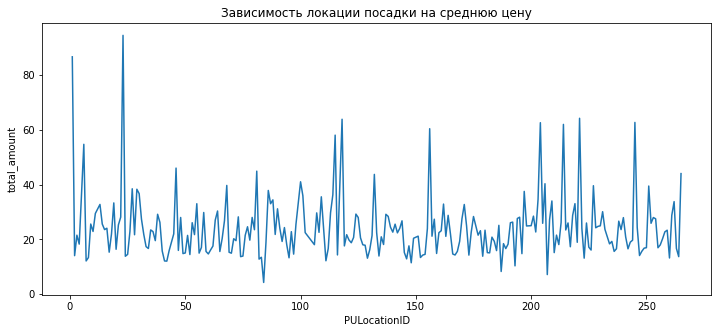

In [72]:
x =  data[['PULocationID', 'total_amount']].groupby(['PULocationID']).mean().index
y =   data[['PULocationID', 'total_amount']].groupby(['PULocationID']).mean().values

# взглянем как локация посадки влияет на среднюю цену
plt.figure(figsize=(12, 5))
plt.title('Зависимость локации посадки на среднюю цену')
plt.xlabel('PULocationID')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

как видим, локация вызова тоже сильно влияет на цену. Можно объяснить, например, люди добираются с работы домой или с дома до работы в час пик. и в этих районах большой или маленький трафик, что может влиять и на цену

In [73]:
x =  data[['DOLocationID', 'total_amount']].groupby(['DOLocationID']).mean().index
y =   data[['DOLocationID', 'total_amount']].groupby(['DOLocationID']).mean().values

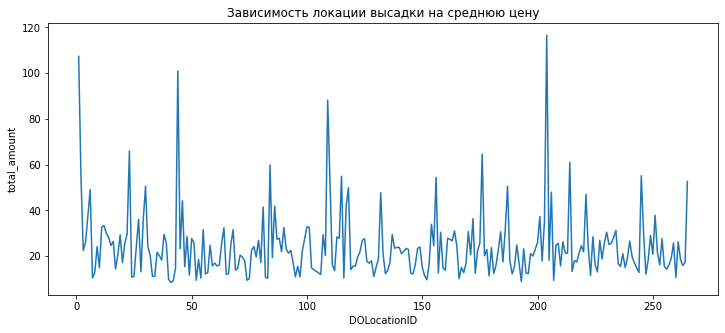

In [74]:
# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))
plt.title('Зависимость локации высадки на среднюю цену')
plt.xlabel('DOLocationID')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

In [75]:
data[['passenger_count', 'total_amount']].groupby(['passenger_count']).agg(['mean', 'count'])

total_amount        
                        mean   count
passenger_count                     
0.0                14.533984    1230
1.0                15.024767  594859
2.0                15.823888   51393
3.0                15.544805   10178
4.0                15.727928    3422
5.0                14.524307   20332
6.0                14.272626   10126
7.0                20.912000      15
8.0                29.688571      21
9.0                10.252500       4

количество пассажиров почти не влияет на среднюю цену. Если не братьв рассчет редкие случаи, такие как 7+ пассажиров. Цена определяется не зависимо от пассажиров.

<ipython-input-76-56c094eeec77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_distance'] = data['trip_distance'].apply(lambda x: round(x))


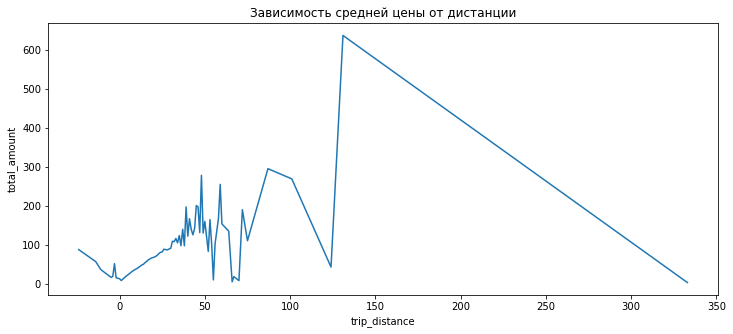

In [76]:
# признак категорийны. округлим  до целых, для лучшего всприятия

data['trip_distance'] = data['trip_distance'].apply(lambda x: round(x))

x =  data[['trip_distance', 'total_amount']].groupby(['trip_distance']).mean().sort_index().index
y =   data[['trip_distance', 'total_amount']].groupby(['trip_distance']).mean().sort_index().values

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость средней цены от дистанции')
plt.xlabel('trip_distance')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

In [161]:
data[['trip_distance', 'total_amount']].groupby(['trip_distance']).agg(['mean','count'])[8:-20]

total_amount        
                      mean   count
trip_distance                     
0                12.808001   62821
1                 8.373023  252059
2                12.489073  155503
3                16.584888   77925
4                20.103258   43940
5                23.486517   24934
6                26.835343   19598
7                30.432929   14860
8                33.620994   10299
9                36.430483    6255
10               38.827476    4710
11               41.595513    3189
12               44.683883    2444
13               48.282788    1883
14               50.177243    1832
15               54.771013    1342
16               58.057970    1128
17               61.955979    1042
18               64.330755    1192
19               66.725395    1012
20               67.883135     571
21               69.847297     481
22               72.725672     305
23               77.373755     245
24               80.804866     224
25               81.996627     249
26               88.803701     254
27               87.803239     284
28               87.013302     215
29               89.222410     249
30               91.276968     188
31              109.204722      72
32              108.129231      52
33              116.280476      21
34              105.045833      36
35              123.958333      18
36               97.815833      12
37              139.790000       7
38               97.516250       8
39              197.198000       5
40              122.331429       7
41              166.960000       7
42              139.510000       6
43              125.725000       4
44              142.125714       7
45              200.800000       1
46              197.550000       5
47              131.425000       4
48              278.300000       2
49              130.225000       4

Дальше расстояние - выше цена

<ipython-input-78-666311bb63f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fare_amount'] = data['fare_amount'].apply(lambda x: round(x))


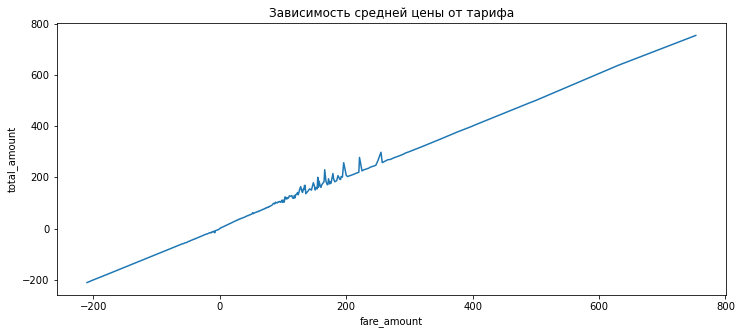

In [78]:
# признак категорийны. округлим  до целых, для лучшего всприятия

data['fare_amount'] = data['fare_amount'].apply(lambda x: round(x))

x =  data[['fare_amount', 'total_amount']].groupby(['fare_amount']).mean().sort_index().index
y =   data[['fare_amount', 'total_amount']].groupby(['fare_amount']).mean().sort_index().values

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость средней цены от тарифа')
plt.xlabel('fare_amount')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

зависимость линейная. Так как тариф - основная составляющая

In [79]:
data[['extra', 'total_amount']].groupby(['extra']).agg(['mean', 'count'])

total_amount        
              mean   count
extra                     
-4.50   -57.300000      10
-3.25   -11.050000       1
-1.00    -5.554882     381
-0.50    -4.941945     658
 0.00    15.423192  355742
 0.50    13.963035  180255
 0.80     3.800000       1
 1.00    14.638391  136888
 1.80     4.800000       1
 2.00     5.670000       1
 2.75    23.042783    9691
 3.25    23.315470    4132
 3.75    22.623957    3510
 4.50    68.141165     309

Больше расстояние - больше extra - больше тариф

In [80]:
data[['mta_tax', 'total_amount']].groupby(['mta_tax']).agg(['mean', 'count'])

total_amount        
                mean   count
mta_tax                     
-0.50      -6.203685    1992
 0.00      21.733609   17372
 0.50      14.959924  672208
 2.75       2.750000       1
 3.55      28.164286       7

можно предположить, что налог уплачиваеся за дистанцию. в таком случае, при коротких дистанция меньше средняя цена и уплачивается налог

In [81]:
data[['tip_amount', 'total_amount']].groupby(['tip_amount']).agg(['mean', 'count'])

total_amount        
                   mean   count
tip_amount                     
-90          -98.800000       1
-3           -16.800000       1
-2           -24.250000       1
-1            -4.378214      28
 0            13.657175  393686
...                 ...     ...
 284         293.020000       1
 300         307.326667       3
 333         357.300000       1
 441         452.800000       1
 450         458.850000       2

[88 rows x 2 columns]

<ipython-input-82-6e97bd71c8b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tip_amount'] = data['tip_amount'].apply(lambda x: round(x))


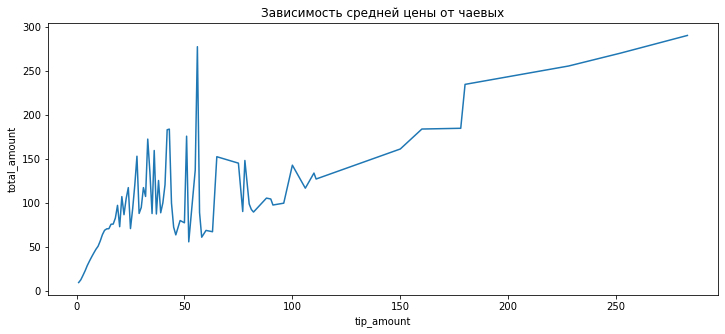

In [82]:
# округлим  до целых, для лучшего всприятия

data['tip_amount'] = data['tip_amount'].apply(lambda x: round(x))

x =  data[['tip_amount', 'total_amount']].groupby(['tip_amount']).mean().sort_index().index[5:-5]
y =   data[['tip_amount', 'total_amount']].groupby(['tip_amount']).mean().sort_index().values[5:-5]

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость средней цены от чаевых')
plt.xlabel('tip_amount')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

зависимость почти линейная. при оплате до 100 долларов. Можно предположить, что чем дальше цена от 100 долларов, тем она кажется незначительнее и не жалко чаевых накинуть.

In [83]:
data[['payment_type', 'total_amount', 'trip_distance']].groupby(['payment_type']).agg(['mean', 'count'])

total_amount         trip_distance        
                     mean   count          mean   count
payment_type                                           
1.0             17.609093  375922      2.859540  375922
2.0             12.194938  310807      2.333368  310807
3.0              2.208288    3523      1.118081    3523
4.0              2.749870    1304      1.543712    1304
5.0             12.322917      24      1.958333      24

при первом типе оплаты больше средний чек. Так как при нем же дальше средняя дистанция, получается, люди, полюзующиеся 1м типом оплаты, чаще ездят на дальние расстояния. Соответственно, средняя оплата больше

In [84]:
data[['trip_type', 'total_amount', 'trip_distance']].groupby(['trip_type']).agg(['mean', 'count'])

total_amount         trip_distance        
                  mean   count          mean   count
trip_type                                           
1.0          14.918995  675581      2.599053  675581
2.0          21.413191   15999      3.145134   15999

Можно предположить. что при втором типе поездки, проезжают больше расстояния, отсюда и выше оплата

In [85]:
data[['congestion_surcharge', 'total_amount', 'trip_distance']].groupby(['congestion_surcharge']).agg(['mean', 'count'])

total_amount         trip_distance        
                             mean   count          mean   count
congestion_surcharge                                           
-2.75                   -9.300000      10      0.600000      10
 0.00                   13.455957  578742      2.312443  578742
 0.75                   20.810000      12      4.666667      12
 2.50                   25.316319     182      5.142857     182
 2.75                   23.343638  112634      4.145143  112634

Так называемая, оплата за проезд через центр города. Предположу, что дальше дистанция - чаще едут с окраин в центр. Соответственно, выше налог и выше цена поездки

In [86]:
# переведём в признак из date во float
data['dur'] = (data['dur']/60).astype(float)
# округлим его
data['dur'] = data['dur'].apply(lambda x: round(x))

<ipython-input-86-ae5e980e6a42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dur'] = (data['dur']/60).astype(float)
<ipython-input-86-ae5e980e6a42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dur'] = data['dur'].apply(lambda x: round(x))


In [89]:
data['dur'] 

0          1
1          5
2          3
3         14
4          3
          ..
782341    10
782342    19
782343     6
782344     6
782345     5
Name: dur, Length: 691580, dtype: int64

In [90]:
data[['dur', 'total_amount', 'trip_distance']].groupby(['dur']).agg(['mean', 'count'])

total_amount        trip_distance       
             mean  count          mean  count
dur                                          
0       14.547635  10408      0.216660  10408
1        6.424410   6589      0.127333   6589
2        5.767740  13857      0.322075  13857
3        6.083273  25983      0.664819  25983
4        6.791075  38899      0.876269  38899
...           ...    ...           ...    ...
1436    14.576610     59      2.661017     59
1437    19.385610     41      3.853659     41
1438    16.843617     47      3.468085     47
1439    15.059762     42      2.547619     42
1440    17.986250      8      3.750000      8

[873 rows x 4 columns]

In [91]:
# разобьем dur на категории для лучшего восприятия
def dur_sort(x):
    """функция для категоризации дистанции"""
    if x<=2:
        return 1
    elif x<=5:
        return 2
    elif x<8:
        return 3
    elif x<=10:
        return 4
    elif x<=15:
        return 5
    elif x<=20:
        return 6
    elif x<=30:
        return 7
    elif x<=60:
        return 8
    elif x<=120:
        return 9
    elif x<=180:
        return 10
    elif x<= 300:
        return 11
    elif x<= 500:
        return 12
    elif x<=1000:
        return 13
    else:
        return 14
    

In [92]:
# добавим пока новым признаком
data['dur_sorted'] = data['dur'].apply(dur_sort)

<ipython-input-92-ba0b6c2782fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dur_sorted'] = data['dur'].apply(dur_sort)


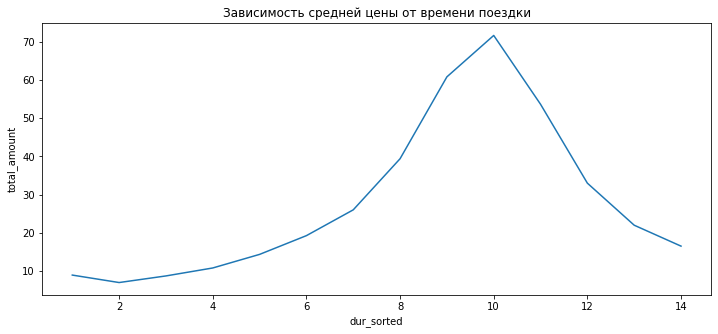

In [93]:

x =  data[['dur_sorted', 'total_amount']].groupby(['dur_sorted']).mean().sort_index().index
y =   data[['dur_sorted', 'total_amount']].groupby(['dur_sorted']).mean().sort_index().values

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость средней цены от времени поездки')
plt.xlabel('dur_sorted')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

In [94]:
data[['dur_sorted', 'total_amount', 'trip_distance']].groupby(['dur_sorted']).agg(['mean', 'count'])

total_amount         trip_distance        
                   mean   count          mean   count
dur_sorted                                           
1              8.869702   30854      0.244928   30854
2              6.913066  108018      0.866143  108018
3              8.647457   91770      1.140166   91770
4             10.735128  122960      1.623861  122960
5             14.299606  141589      2.483145  141589
6             19.218670   79196      3.632494   79196
7             25.986850   68919      5.126569   68919
8             39.397764   39566      8.127230   39566
9             60.875784    4903     13.957373    4903
10            71.741565     294     14.397959     294
11            53.686583     199     11.834171     199
12            32.988686     274      6.799270     274
13            21.954816     326      3.739264     326
14            16.465701    2712      3.142699    2712

До длительности поездки 3 часа, цена возрастает, так как возрастает и дистанция. далее начинается спад средней цены. Так как дистанция падает тоже, предположу, что учитывается неоплачиваем время ожидания клиента. или водители вовремя не выключают счетчик. или укажывается подача заранее. и это время идет во время в пути.

In [95]:
data[['month', 'total_amount']].groupby(['month']).agg(['mean', 'count'])

total_amount        
              mean   count
month                     
1        14.974178  331716
12       15.156850  359864

Средняя цена поездки от месяца не зависит. Месяц - слишком долго. А как мы знаем, на дистанции мелочи сглаживаются.

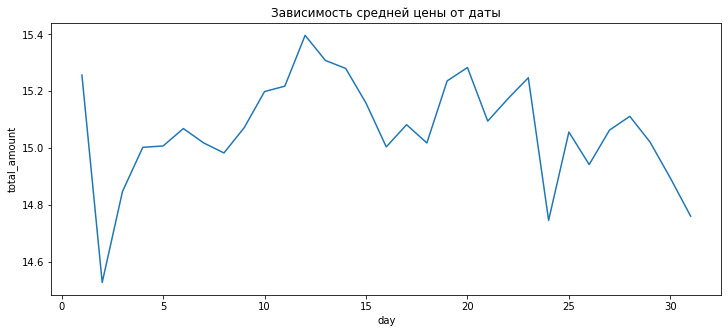

In [96]:

x =  data[['day', 'total_amount']].groupby(['day']).mean().sort_index().index
y =   data[['day', 'total_amount']].groupby(['day']).mean().sort_index().values

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость средней цены от даты')
plt.xlabel('day')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

в течение всего месяца средняя цена 15+- пару процентов. 

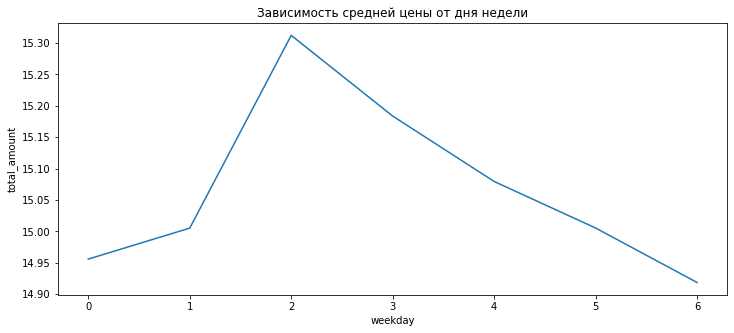

In [97]:
x =  data[['weekday', 'total_amount']].groupby(['weekday']).mean().sort_index().index
y =   data[['weekday', 'total_amount']].groupby(['weekday']).mean().sort_index().values

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость средней цены от дня недели')
plt.xlabel('weekday')
plt.ylabel('total_amount')
plt.plot(x, y)
plt.show()

Средняя цена слабо отличается в зависимости от дня недели. Возможно, к середине недели планируют чуть больше дальних поездок и к выходным снова идет на спад, так как отдыхают

###  Найдите аномальные поездки. Почему именно эти поездки вы считаете аномальными?

Из написанного в прошлом зарделе, могу предположить:
1. количество пассажиров более 6. средний чек сразу возрастает на 50%
2. Поездки с отрицательным расстоянием. Потому что отрицательное расстояние - это уже странно
3. Поездки с очень большим расстоянием более 100. Встречаются редко
4. Количество чаевых на 50% превышает сумму тарифа
5. Длительность поездки более 3 часов. Встречаются редко и подозрительно маленькие расстояния и средняя сумма

### Постройте распределение по стоимости поездок. Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?

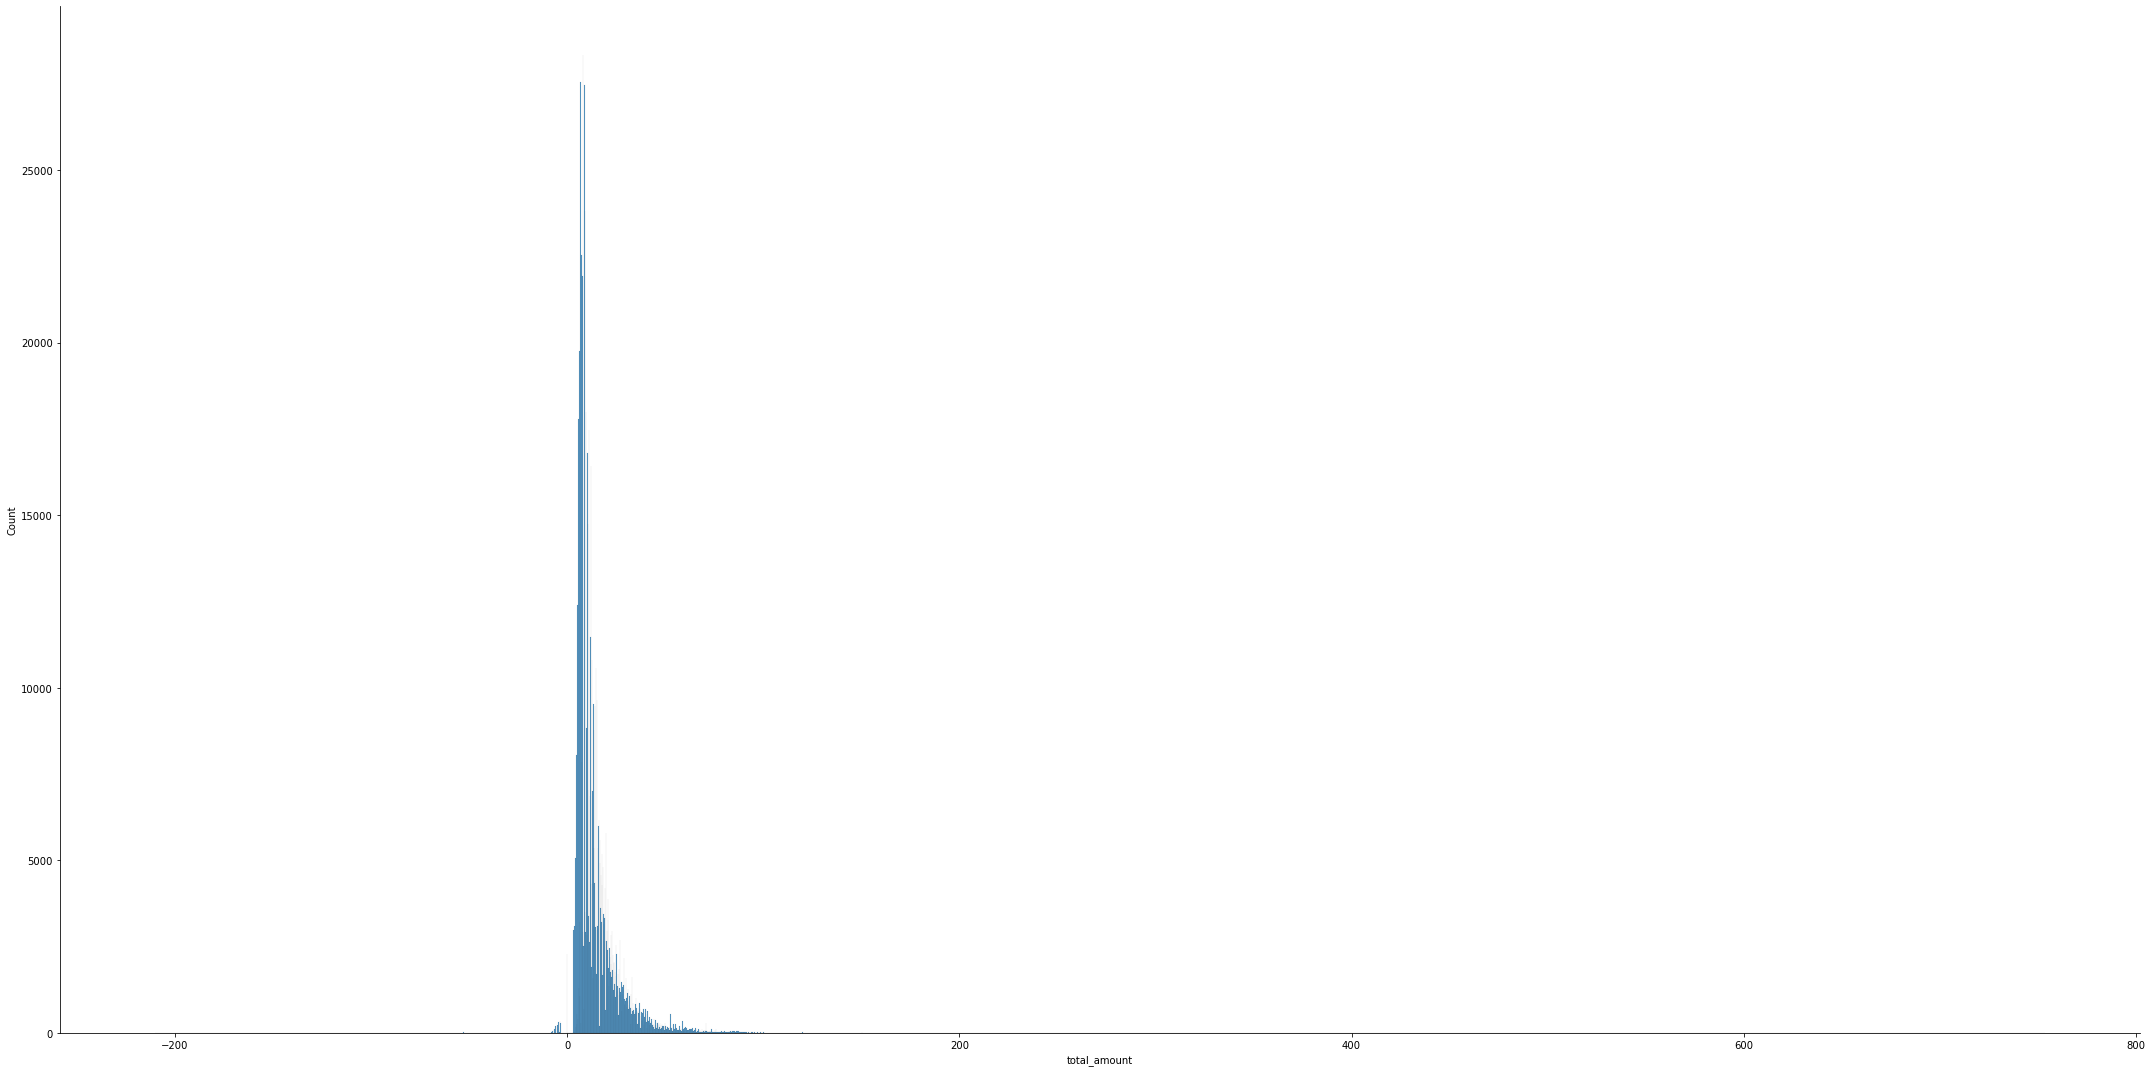

In [98]:
# Строим распределение 
sns.displot(data['total_amount'],height=15, aspect=2)

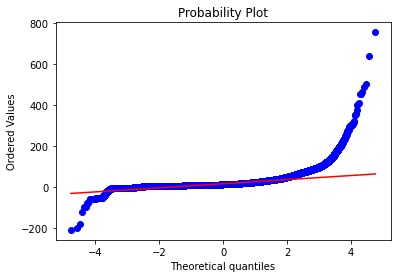

In [99]:
# Построим QQ-Plot для анализа нормальности распределения

stats.probplot(data['total_amount'].values, dist="norm", plot=pylab)
pylab.show()

Взглянув на график, можно сказать, что у распределения слишком сильные хвосты. Нормальным не является

### Из данных постройте модель, которая описывает тариф (т.е. стоимость поездки от других факторов).

## Уже после построения модели, указанной ниже, я понял, что нужно было сделать другое. Тем не менее, код решил оставить. Нужная модель будет в разделе после

In [265]:
df = data.copy()

# уберём из данных минусовые поездки и поездки на отрицательную дистанцию, а так же очень длинные поездки
df = df.query('fare_amount >=0 or trip_distance >= 0')
df = df.query('dur_sorted <= 10 and fare_amount >= 0 and trip_distance >= 0')

# удалим лишние признаки
# удалю так же тариф и чаевые
df.drop(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'total_amount'], axis=1, inplace=True)

In [268]:
# добавим признак "время посадки"
df['pickup_time'] = data['lpep_pickup_datetime'].apply(lambda x: x.hour)

# Добавим признак, означающий дистанцию в минуту
df['dist_per_h'] = df['dur'] / df['trip_distance']
# избавимся от деления на 0:
df['dist_per_h'] = df['dist_per_h'].apply(lambda x: 0 if x==np.inf else x)
# избавимся от некорректных значений
df['dist_per_h'].fillna(0, inplace=True)


In [269]:
# разделим признаки

# бинарные
bin_cols = ['VendorID', 'store_and_fwd_flag']

# категорийные
cat_cols = ['RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'payment_type',
           'trip_type', 'dur_sorted', 'month', 'day', 'weekday', 'pickup_time']

# числовые
num_cols = [ 'tolls_amount', 'mta_tax', 'extra', 'trip_distance', 'dist_per_h']

In [270]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [271]:
# преобразуем бинарные признаки

label_encoder = LabelEncoder()
for col in bin_cols:
    df[col] = label_encoder.fit_transform(df[col])

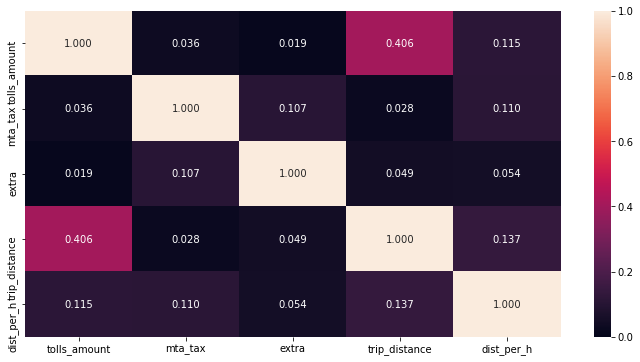

In [272]:
# посмотрим на корреляцию признаков между собой числовых признаков
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1,
            annot=True, fmt=".3f")

trip_distance и toll_amount сильно скоррелированы. Нужно определить, какой удалим

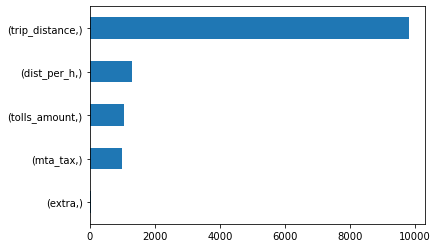

In [273]:
#определяем значимость наших переменных
imp_num = pd.Series(f_classif(df[num_cols], data['fare_amount'])[0], index=[num_cols])
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Так как toll_amount меньше влияет на целевую переменную, его и удалим. А extra не влияет вовсе. удалим тоже.

In [274]:
num_cols = ['mta_tax', 'trip_distance', 'dist_per_h']

In [275]:
cat_cols

['RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'payment_type',
 'trip_type',
 'dur_sorted',
 'month',
 'day',
 'weekday',
 'pickup_time']

In [276]:
df

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,payment_type,trip_type,congestion_surcharge,dur,month,day,weekday,dur_sorted,pickup_time,dist_per_h
0,0,0,1.0,145,145,1.0,0,3,0.5,0.5,0,0.0,0.3,2.0,1.0,0.00,1,12,1,6,1,0,0.000000
1,1,0,1.0,24,41,1.0,1,6,0.5,0.5,2,0.0,0.3,1.0,1.0,0.00,5,12,1,6,2,0,5.000000
2,1,0,1.0,74,41,1.0,1,4,0.5,0.5,0,0.0,0.3,2.0,1.0,0.00,3,12,1,6,2,0,3.000000
3,1,0,1.0,255,157,1.0,4,14,0.5,0.5,0,0.0,0.3,2.0,1.0,0.00,14,12,1,6,5,0,3.500000
4,1,0,1.0,80,255,1.0,0,4,0.5,0.5,0,0.0,0.3,2.0,1.0,0.00,3,12,1,6,2,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782341,1,0,1.0,42,74,1.0,2,10,0.5,0.5,0,0.0,0.3,2.0,1.0,0.00,10,1,31,4,4,23,5.000000
782342,1,0,1.0,74,159,1.0,3,15,0.5,0.5,0,0.0,0.3,2.0,1.0,0.00,19,1,31,4,6,23,6.333333
782343,1,0,5.0,42,42,1.0,1,7,0.0,0.0,0,0.0,0.3,1.0,2.0,0.00,6,1,31,4,3,23,6.000000
782344,1,0,1.0,75,263,1.0,1,6,0.5,0.5,1,0.0,0.3,1.0,1.0,0.00,6,1,31,4,3,23,6.000000


#### Построим модели. Для примера возьмем две модели на базовых настройках

In [277]:
# из обработанных признаков склеим новый датасет 
last_df = df[cat_cols].join(df[num_cols])
last_df = last_df.join(df[bin_cols])

# делим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(last_df, df['fare_amount'], random_state=0, shuffle=True)

### Линейная регрессия

In [278]:
# обозначаем модель
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Средняя ошибка модели составляет {rmse.round(2)}')

Средняя ошибка модели составляет 5.22


### Градиентный бустинг

In [281]:
# обозначим модель на базовых параметрах
gbr = GradientBoostingRegressor(n_estimators=500, max_depth=5)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Средняя ошибка модели составляет {rmse.round(2)}')

Средняя ошибка модели составляет 3.59


Градиентный бустинг намного лучше справился. Его и будем улучшать

In [ ]:
# Подберём параметры под модель
#params = {
#    'n_estimators': [250, 500, 1000],
#    'max_depth': [3, 5, 7],
#    'learning_rate': [0.01, 1],
#    'min_samples_split': [2, 3, 5]
#}
# зададим все параметры для обучения
#best_bgr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
# обучим
#best_bgr.fit(X_train, y_train)

In [113]:
# На это остановлюсь

### Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.

In [282]:
# уберём из данных минусовые поездки и поездки на отрицательную дистанцию, а так же очень длинные поездки
data = data.query('fare_amount >=0 or trip_distance >= 0')
data_for_anal = data.query('dur_sorted <= 10 and fare_amount >= 0 and trip_distance >= 0')

In [283]:
# извлечём время посадки
data['pickup_time'] = data['lpep_pickup_datetime'].apply(lambda x: x.hour)

In [284]:
pd.set_option('display.max_rows', 168)

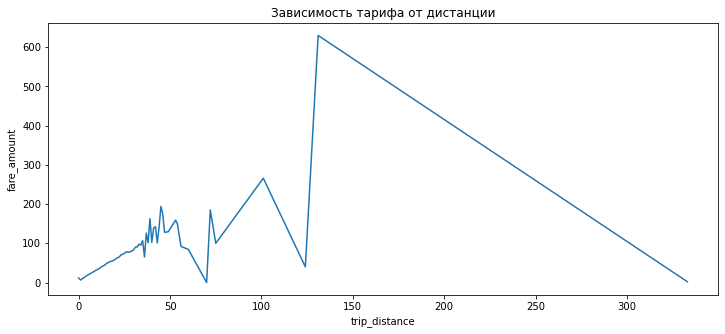

In [285]:
x =  data_for_anal[['trip_distance', 'fare_amount']].groupby(['trip_distance']).mean().sort_index().index
y =   data_for_anal[['trip_distance', 'fare_amount']].groupby(['trip_distance']).mean().sort_index().values

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость тарифа от дистанции')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.plot(x, y)
plt.show()

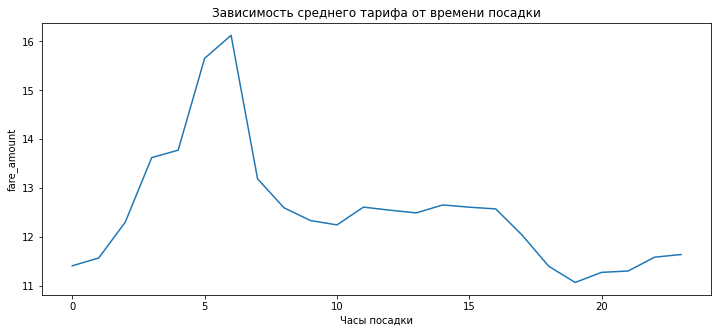

In [358]:
# взглянем как меняется тариф в зависимости от для недели
x =  data_for_anal[['pickup_time', 'fare_amount']].groupby(['pickup_time']).mean().sort_index().index
y =   data_for_anal[['pickup_time', 'fare_amount']].groupby(['pickup_time']).mean().sort_index().values

# взглянем как локация высадки влияет на среднюю цену
plt.figure(figsize=(12, 5))

plt.title('Зависимость среднего тарифа от времени посадки')
plt.xlabel('Часы посадки')
plt.ylabel('fare_amount')
plt.plot(x, y)
plt.show()

In [287]:
for_model = data_for_anal[['pickup_time', 'dur', 'weekday', 'trip_distance', 'fare_amount']].groupby(['weekday', 'pickup_time']).agg(['mean', 'count'])

In [304]:
for_model.mean()

dur            mean       12.774044
               count    4083.029762
trip_distance  mean        2.776405
               count    4083.029762
fare_amount    mean       12.471800
               count    4083.029762
dtype: float64

Обобщенно, модель можно было бы представить, как:

1. фиксированная цена. Возьмём 2.5 доллара
2. 0.8 доллара за 1 минуту предполагаемого времени пути
3. 0.25 доллар надбавка за 1 км в пути


### Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.

In [406]:
# сделаем столбце предсказаний цены из модели выше
for_model['prediction'] = 2.5 + (for_model['dur']['mean']*0.75) + (for_model['trip_distance']['mean'] * 0.1)

In [407]:
# найдём разницу между предсказанной цену во временной промежуток и фактической
for_model['difference'] = (for_model['prediction'] / for_model['dur']['mean']) * 100

In [408]:
for_model

dur       trip_distance       fare_amount        \
                          mean count          mean count        mean count   
weekday pickup_time                                                          
0       0             9.775946  1638      2.584249  1638   10.760684  1638   
        1            10.122449  1029      2.680272  1029   11.224490  1029   
        2             9.712098   653      2.794793   653   11.963247   653   
        3            11.267581   583      3.277873   583   13.174957   583   
        4            11.504902   612      3.174837   612   13.753268   612   
        5            14.085803   641      3.937598   641   15.680187   641   
        6            17.034226  1344      4.000744  1344   16.732143  1344   
        7            15.500163  3073      2.786853  3073   13.591279  3073   
        8            14.850927  5125      2.597854  5125   12.717659  5125   
        9            13.938329  5578      2.578164  5578   12.396199  5578   
        10           13.424101  5145      2.635957  5145   12.216910  5145   
        11           13.915579  4750      2.716421  4750   12.650737  4750   
        12           13.623450  4759      2.630805  4759   12.606430  4759   
        13           13.694818  5056      2.566456  5056   12.317642  5056   
        14           14.488946  5428      2.609985  5428   12.570560  5428   
        15           14.858255  6039      2.452062  6039   12.323398  6039   
        16           15.204384  6615      2.460469  6615   12.380348  6615   
        17           14.453419  7181      2.388247  7181   11.980783  7181   
        18           12.496440  7443      2.232299  7443   10.887142  7443   
        19           11.401941  6802      2.359159  6802   10.728021  6802   
        20           10.913693  5156      2.428627  5156   10.846974  5156   
        21           10.831880  4128      2.518895  4128   10.904797  4128   
        22           10.825007  3343      2.705354  3343   11.186360  3343   
        23           10.159838  2465      2.632049  2465   10.998783  2465   
1       0             9.912708  1684      2.652613  1684   11.210808  1684   
        1             9.222530  1083      2.518006  1083   11.580794  1083   
        2             9.507937   630      2.601587   630   11.674603   630   
        3             9.740286   489      2.887526   489   11.867076   489   
        4            11.091816   501      3.538922   501   13.936128   501   
        5            15.171220   549      4.083789   549   16.961749   549   
        6            16.415584  1232      3.922890  1232   16.382305  1232   
        7            14.818383  3166      2.658876  3166   12.926406  3166   
        8            14.557198  5140      2.524319  5140   12.478794  5140   
        9            13.999292  5648      2.532047  5648   12.299221  5648   
        10           13.927969  5095      2.623945  5095   12.483611  5095   
        11           13.998399  4997      2.632179  4997   12.646388  4997   
        12           14.194461  4911      2.625535  4911   12.754836  4911   
        13           13.997561  5329      2.620942  5329   12.505536  5329   
        14           14.654536  5523      2.637878  5523   12.809705  5523   
        15           15.204144  6515      2.528780  6515   12.655718  6515   
        16           15.317744  6949      2.448410  6949   12.476903  6949   
        17           14.355627  7730      2.273351  7730   11.698060  7730   
        18           12.909746  8044      2.299602  8044   11.301591  8044   
        19           11.499586  7250      2.297793  7250   10.790069  7250   
        20           11.055172  6090      2.428407  6090   10.926765  6090   
        21           11.534060  5226      2.570608  5226   11.221584  5226   
        22           11.224636  4189      2.719981  4189   11.626880  4189   
        23           10.768392  3303      2.760823  3303   11.552831  3303   
2       0            11.092434  2445      2.80981

На основании вышепоказанной таблицы, можно предположить, что скидки есть во временные интервалы:
    1. Будние дни - 5-6 часов утра. Цена от предсказанной отличается на 8%
    2. Во все дни в 15-17 часов дня. Цена в среднем отличается на 7%

In [381]:
# посмотрим предсказание в разреде даты
for_model_02 = data_for_anal[['pickup_time', 'dur', 'day', 'trip_distance', 'fare_amount']].groupby(['day', 'pickup_time']).agg(['mean', 'count'])

for_model_02['prediction'] = 2.5 + (for_model_02['dur']['mean']*0.75) + (for_model_02['trip_distance']['mean'] * 0.1)

# найдём разницу между предсказанной цену во временной промежуток и фактической
for_model_02['difference'] = (for_model_02['prediction'] / for_model_02['dur']['mean']) * 100

In [410]:
for_model_02[for_model_02['difference']<=92]

dur       trip_distance       fare_amount        \
                      mean count          mean count        mean count   
day pickup_time                                                          
6   6            17.349481   289      3.920415   289   16.865052   289   
    16           16.449686  1590      2.538994  1590   13.211950  1590   
9   6            17.168317   303      3.683168   303   15.828383   303   
    7            16.992298   779      2.758665   779   13.539153   779   
    16           16.558955  1569      2.458891  1569   13.131294  1569   
10  15           16.550813  1476      2.521680  1476   13.017615  1476   
    16           16.217219  1510      2.335762  1510   12.689404  1510   
12  17           16.555622  1663      2.543596  1663   13.022850  1663   
13  16           16.713504  1644      2.434915  1644   12.830900  1644   
17  15           16.577104  1485      2.535354  1485   13.111111  1485   
18  16           16.974982  1359      2.507726  1359   13.170714  1359   
20  14           16.464286  1176      2.720238  1176   13.625850  1176   
    15           16.425074  1348      2.623887  1348   13.173591  1348   
    16           16.622105  1511      2.597617  1511   13.001324  1511   
    17           16.312775  1589      2.657017  1589   13.230963  1589   
27  6            17.887597   258      4.589147   258   18.705426   258   

                prediction difference  
                                       
day pickup_time                        
6   6            15.904152  91.669326  
    16           15.091164  91.741350  
9   6            15.744554  91.707036  
    7            15.520090  91.336028  
    16           15.165105  91.582503  
10  15           15.165278  91.628597  
    16           14.896490  91.856011  
12  17           15.171076  91.637004  
13  16           15.278619  91.414820  
17  15           15.186364  91.610472  
18  16           15.482009  91.204864  
20  14           15.120238  91.836587  
    15           15.081194  91.818120  
    16           15.226340  91.602962  
    17           15.000283  91.954207  
27  6            16.374612  91.541712

Можно предположить, что в эти дни и время действовали скидки на такси. Так как цены отличаются особо сильно